In [10]:
import datasets
from datasets import load_dataset
import pandas as pd
import seaborn as sns


# haerae-hub web-text

In [2]:
ko_ds=load_dataset("HAERAE-HUB/KOREAN-WEBTEXT")

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1284879 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/17 [00:00<?, ?it/s]

In [27]:
ko_ds

Dataset({
    features: ['text', 'source', 'token_count', '__index_level_0__'],
    num_rows: 1284879
})

In [28]:
ko_ds=ko_ds.remove_columns('__index_level_0__')

In [34]:
ids=[]

for i in range(len(ko_ds)):
    ids.append(f"ko_{i}")
    


ko_ds=ko_ds.add_column("id",ids)

<Axes: ylabel='Count'>

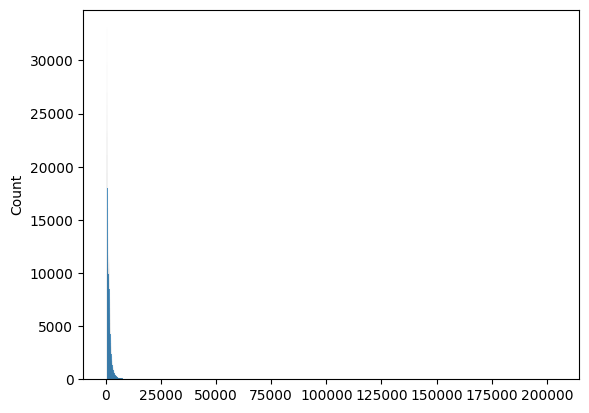

In [11]:
sns.histplot(ko_ds["token_count"])

<Axes: >

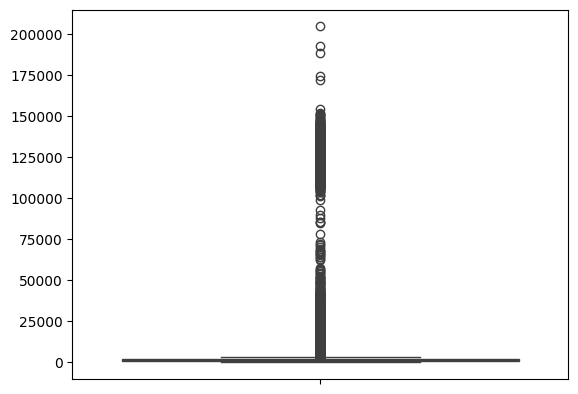

In [12]:
sns.boxplot(ko_ds["token_count"])

In [111]:
len(ko_ds)

1284178

In [110]:
ko_ds=ko_ds.filter(lambda x: "애니위즈" not in x["text"])

Filter:   0%|          | 0/1284187 [00:00<?, ? examples/s]

In [179]:
ko_ds=ko_ds.select(range(90,len(ko_ds)))

In [188]:
ko_ds.save_to_disk("/azurestorage/data/cpt/KOREAN-WEBTEXT-filtered")

Saving the dataset (0/18 shards):   0%|          | 0/1284088 [00:00<?, ? examples/s]

In [191]:
ko_ds_under_8000=ko_ds.filter(lambda x: x["token_count"]<=8000)

Filter:   0%|          | 0/1284088 [00:00<?, ? examples/s]

<Axes: >

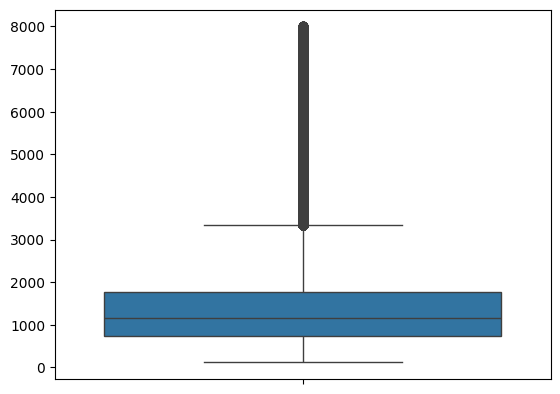

In [193]:
sns.boxplot(ko_ds_under_8000["token_count"])

In [195]:
len(ko_ds)

1284088

In [194]:
sum(ko_ds_under_8000["token_count"])

1838660204

In [196]:
ko_ds_1000=ko_ds_under_8000.filter(lambda x:x["token_count"]<1000)

Filter:   0%|          | 0/1273730 [00:00<?, ? examples/s]

In [198]:
len(ko_ds_1000)

540331

In [199]:
ko_ds_1000_2000=ko_ds_under_8000.filter(lambda x:x["token_count"]>=1000 and x["token_count"]<2000)

Filter:   0%|          | 0/1273730 [00:00<?, ? examples/s]

In [200]:
ko_ds_1000_2000

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 490368
})

In [201]:
ko_ds_2000_4000=ko_ds_under_8000.filter(lambda x:x["token_count"]>=2000 and x["token_count"]<4000)

Filter:   0%|          | 0/1273730 [00:00<?, ? examples/s]

In [207]:
ko_ds_2000_4000

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 204446
})

In [208]:
sum(ko_ds_2000_4000["token_count"])

539554396

In [203]:
ko_ds_over_4000=ko_ds_under_8000.filter(lambda x:x["token_count"]>=4000)

Filter:   0%|          | 0/1273730 [00:00<?, ? examples/s]

In [204]:
ko_ds_over_4000

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 38585
})

In [206]:
sum(ko_ds_over_4000["token_count"])

202981450

In [211]:
ko_ds_over_4000

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 38585
})

In [214]:
ko_ds_2000_4000.shuffle().select(range(len(ko_ds_over_4000)))

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 38585
})

In [ ]:
[ko_ds_2000_4000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_1000_2000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_1000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_over_4000]

In [215]:
ko_ds_1000_2000.shuffle().select(range(len(ko_ds_over_4000)))

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 38585
})

In [216]:
ko_ds_1000.shuffle().select(range(len(ko_ds_over_4000)))

Dataset({
    features: ['text', 'source', 'token_count', 'id'],
    num_rows: 38585
})

In [265]:
ko_ds_sampled=datasets.concatenate_datasets([ko_ds_2000_4000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_1000_2000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_1000.shuffle().select(range(len(ko_ds_over_4000))),ko_ds_over_4000.shuffle()])

In [266]:
ko_ds_sampled=ko_ds_sampled.shuffle()

In [267]:
sum(ko_ds_sampled["token_count"])

388213808

In [268]:
ko_ds_sampled.save_to_disk("/azurestorage/data/cpt/KOREAN-WEBTEXT-sampled_150K_380MT")

Saving the dataset (0/3 shards):   0%|          | 0/154340 [00:00<?, ? examples/s]

# fineweb-edu

In [232]:
en_ds=load_dataset("deatos/fineweb-edu-mini-combined")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [237]:
en_ds_train=en_ds["train"]
en_ds_valid=en_ds["validation"]

In [250]:
en_ds=datasets.concatenate_datasets([en_ds_train,en_ds_valid)

In [254]:
sum(en_ds["token_count"])

2451298930

In [256]:
en_ds_filtered=en_ds.filter(lambda x:x["token_count"]<=8000)

Filter:   0%|          | 0/2364101 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
    num_rows: 2364101
})

In [257]:
en_ds_filtered

Dataset({
    features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
    num_rows: 2341329
})

<Axes: ylabel='Count'>

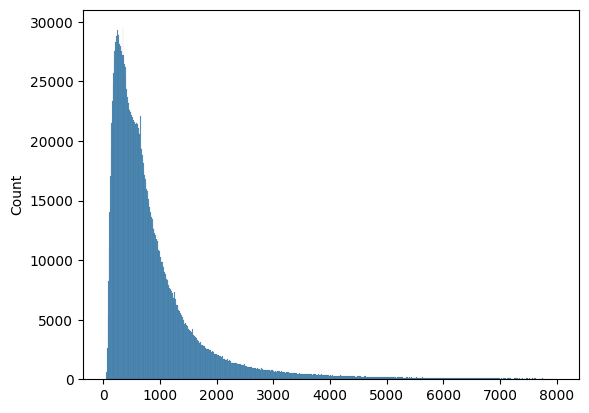

In [260]:
sns.histplot(en_ds_filtered["token_count"])

<Axes: >

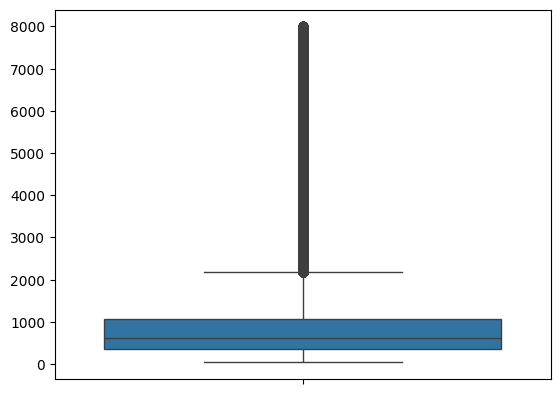

In [261]:
sns.boxplot(en_ds_filtered["token_count"])

In [259]:
sum(en_ds_filtered.select(range(15000))["token_count"])

13409036

In [262]:
en_ds_filtered_1000=en_ds_filtered.filter(lambda x:x["token_count"]<1000)
en_ds_filtered_1000_2000=en_ds_filtered.filter(lambda x:x["token_count"]>=1000 and x["token_count"]<2000)
en_ds_filtered_2000_2000=en_ds_filtered.filter(lambda x:x["token_count"]>=2000 and x["token_count"]<4000)
en_ds_filtered_4000_8000=en_ds_filtered.filter(lambda x:x["token_count"]>=4000)

Filter:   0%|          | 0/2341329 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2341329 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2341329 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2341329 [00:00<?, ? examples/s]

In [277]:
[en_ds_filtered_4000_8000.shuffle().select(range(3800)),en_ds_filtered_2000_4000.shuffle().select(range(3800)),en_ds_filtered_1000_2000.shuffle().select(range(3800)),en_ds_filtered_1000.shuffle().select(range(3800))]

[Dataset({
     features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
     num_rows: 3800
 }),
 Dataset({
     features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
     num_rows: 3800
 }),
 Dataset({
     features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
     num_rows: 3800
 }),
 Dataset({
     features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
     num_rows: 3800
 })]

In [284]:
en_ds_filtered_concat=datasets.concatenate_datasets([en_ds_filtered_4000_8000.shuffle().select(range(3800)),en_ds_filtered_2000_4000.shuffle().select(range(4000)),en_ds_filtered_1000_2000.shuffle().select(range(4000)),en_ds_filtered_1000.shuffle().select(range(4000))])

In [286]:
en_ds_filtered_concat=en_ds_filtered_concat.train_test_split(test_size=0.05)

In [288]:
en_ds_filtered_concat

DatasetDict({
    train: Dataset({
        features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
        num_rows: 15010
    })
    test: Dataset({
        features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
        num_rows: 790
    })
})

In [283]:
sum(en_ds_filtered_concat["token_count"])

37942635

In [287]:
en_ds_filtered_concat.save_to_disk("/azurestorage/data/cpt/fineweb-edu-sampled_15K_38MT")

Saving the dataset (0/1 shards):   0%|          | 0/15010 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/790 [00:00<?, ? examples/s]

In [291]:
en_ds_filtered_concat["train"].select_columns("text")

Dataset({
    features: ['text'],
    num_rows: 15010
})